In [2]:
!pip install yfinance pandas matplotlib

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
AAPL = yf.Ticker("AAPL").history(start='1980-12-15')
KO = yf.Ticker("KO").history(start='1980-12-15')
SP500 = yf.Ticker("^GSPC").history(start='1980-12-15')

In [21]:
data = {
    'aapl': AAPL['Close'],
    'ko': KO['Close'],
    's&p500': SP500['Close']
}

In [22]:
df = pd.DataFrame(data)

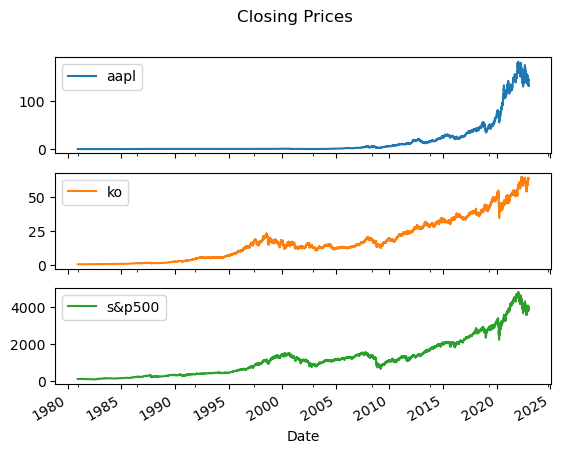

In [23]:
df.plot(subplots=True, title='Closing Prices', legend=True)
plt.show()

In [24]:
df.to_csv('test.csv')

In [25]:
import numpy as np

In [26]:
df['log_aapl'] = np.log(df['aapl']/df['aapl'].shift(1))
df['log_ko'] = np.log(df['ko']/df['ko'].shift(1))
df['log_s&p500'] = np.log(df['s&p500']/df['s&p500'].shift(1))

In [27]:
df = df.drop(df.index[0])

In [28]:
AAPL_returns = df["log_aapl"]
KO_returns = df["log_ko"]
SP500_returns = df["log_s&p500"]

In [29]:
AAPL_KO_correl = AAPL_returns.corr(KO_returns)
AAPL_SP500_correl = AAPL_returns.corr(SP500_returns)
KO_SP500_correl = KO_returns.corr(SP500_returns)
print(AAPL_KO_correl)
print(AAPL_SP500_correl)
print(KO_SP500_correl)

0.2407511736593989
0.48616235166457633
0.570525923108984


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
a = AAPL_returns
k = KO_returns
sp = SP500_returns

Date
1980-12-15 00:00:00-05:00   -0.053581
1980-12-16 00:00:00-05:00   -0.076231
1980-12-17 00:00:00-05:00    0.024449
1980-12-18 00:00:00-05:00    0.028580
1980-12-19 00:00:00-05:00    0.059239
                               ...   
2022-12-19 00:00:00-05:00   -0.016038
2022-12-20 00:00:00-05:00   -0.000529
2022-12-21 00:00:00-05:00    0.023530
2022-12-22 00:00:00-05:00   -0.024060
2022-12-23 00:00:00-05:00   -0.010491
Name: log_aapl, Length: 10598, dtype: float64

In [32]:
a = a.values.reshape(-1, 1)
k = k.values.reshape(-1, 1)
sp = sp.values.reshape(-1, 1)

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(sp, a)
print(lr.intercept_, lr.coef_)
lr.fit(sp, k)
print(lr.intercept_, lr.coef_)

[0.000287] [[1.22048152]]
[0.00030763] [[0.73913927]]
